In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Ex. 1: Community Evaluation [6 points]

Given the graph $\mathcal{G}$, compare the following partitions.

- $[(7,8,9,10), (3,5,4), (6,2,1)]$
- $[(1,2,4,5,6), (3,7,8,9,10)]$

Which partition is best with respect to the modularity score? which for conductance?

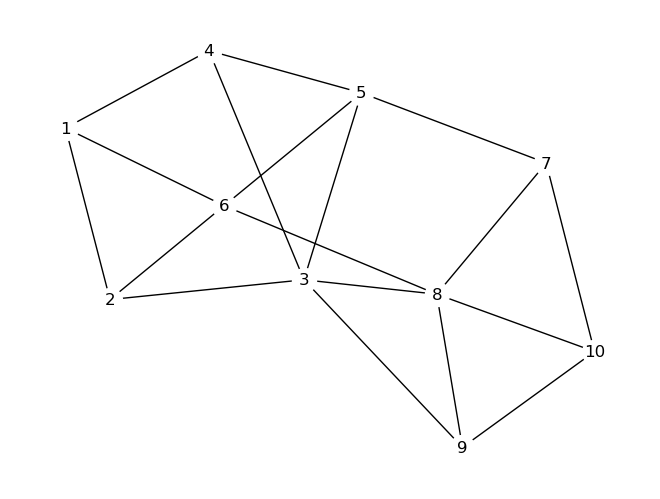

In [10]:
g = nx.Graph()

g.add_edge(1, 2)
g.add_edge(4, 1)
g.add_edge(6, 2)
g.add_edge(8, 6)
g.add_edge(4, 5)
g.add_edge(5, 6)
g.add_edge(5, 7)
g.add_edge(7, 8)
g.add_edge(8, 9)
g.add_edge(3, 4)
g.add_edge(5, 3)
g.add_edge(8, 3)
g.add_edge(9, 3)
g.add_edge(2, 3)
g.add_edge(10,7)
g.add_edge(10,9)
g.add_edge(8,10)
g.add_edge(6,1)

nx.draw_spring(g, with_labels=True, node_color="w")
plt.savefig("net.png")

### Modularity

In [12]:
def modularity(graph, community):
    vc = len(community)
    e = graph.number_of_edges()
    degC = sum([i[1] for i in graph.degree(community)])
    return ((vc/e) - (degC/(2*e)))**2

In [19]:
f"P1 - C1: {modularity(g, [7,8,9,10])} C2: {modularity(g, [3,5,4])} C3: {modularity(g, [6,2,1])}"

'P1 - C1: 0.027777777777777783 C2: 0.027777777777777776 C3: 0.012345679012345684'

In [20]:
f"P2 - C1: {modularity(g, [1,2,4,5,6])} C2: {modularity(g, [3,7,8,9,10])}"

'P2 - C1: 0.03780864197530863 C2: 0.0625'

In [21]:
max(0.0123, 0.0378)

0.0378

### Conductance

In [17]:
def conductance(graph, community):
    gs = nx.subgraph(graph, community)
    ec = gs.number_of_edges()
    eoc = sum([len(list(graph.neighbors(u)))-len(list(gs.neighbors(u))) for u in community])
    return (2*eoc)/((2*ec)+eoc)

In [22]:
f"P1 - C1: {conductance(g, [7,8,9,10])} C2: {conductance(g, [3,5,4])} C3: {conductance(g, [6,2,1])}"

'P1 - C1: 0.5714285714285714 C2: 1.0 C3: 0.8'

In [23]:
f"P2 - C1: {conductance(g, [1,2,4,5,6])} C2: {conductance(g, [3,7,8,9,10])}"

'P2 - C1: 0.5882352941176471 C2: 0.5263157894736842'

In [24]:
min(1.0, 0.588)

0.588

## Ex. 2: Community Discovery [6 points]

Given graph $\mathcal{G}$, compute its communities applying k-clique for k=3,4.

On the obtained partitions evaluate the coverage and internal edge density.

In [25]:
from networkx.algorithms.community import k_clique_communities

k3 = list(k_clique_communities(g, 3))
k3 # complete coverage

[frozenset({1, 2, 6}), frozenset({3, 7, 8, 9, 10}), frozenset({3, 4, 5})]

In [26]:
list(k_clique_communities(g, 4)) # empty coverage

[]

In [28]:
def ied(graph, community):
    sg = nx.subgraph(graph, community)
    ec = sg.number_of_edges()
    vc = sg.number_of_nodes()
    return (2*ec)/(vc*(vc-1))

In [29]:
ed = []
for com in k3:
    
    ed.append(ied(g, com))
min(ed)

0.7

## Es 3: Threshold Model [6 points]

Given the graph $\mathcal{G}$, applying the threshold model considering the following scenarios:

- S1
    - Set of initial infected nodes: I = {10}
    - Node threshold $\tau = \frac{1}{3}$
- S2
    - Set of initial infected nodes: I = {4, 7}
    - Node threshold at iteration $t$ $\tau_t = \frac{1}{2+t}$
  
Consider a node infected at time $t$ iff at least $\tau\%$ of its neighbors were already infected at $t-1$.

### S1

In [33]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [10])

# Setting node parameters
threshold = 1/3
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(6)
for it in iterations:
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: [10]
Iteration: 1 Infected: [7, 9]
Iteration: 2 Infected: [8]
Iteration: 3 Infected: [3]
Iteration: 4 Infected: [2, 4, 5]
Iteration: 5 Infected: [1, 6]


### S2

In [34]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [4,7])

model.set_initial_status(config)

for t in range(5):
    # threshold update
    threshold = 1/(2+t)
    for i in g.nodes():
        config.add_node_configuration("threshold", i, threshold)

    it = model.iteration()
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: [4, 7]
Iteration: 1 Infected: [1, 5, 10]
Iteration: 2 Infected: [2, 6, 8, 9, 3]
Iteration: 3 Infected: []
Iteration: 4 Infected: []


# Ex. 4: Stream Graph [6 points]

Given the stream graph in Figure

- describe the stream graph components G=(T,V,W,E);
- how many nodes and edges does the Stream Graph have?
- what's the neighbors set of d? and of a?
- identify the shortest, the fastest and the foremost paths among [e, a];
- identify (if any) the cliques present in the stream graph.

<img src="stream_ex.png" />

- Nodes = 4.41, Edges = 1.91
- $\Gamma(d)$ = {e, [(10,12)]} 
- $\Gamma(a)$ = {b, [(7,8), (10,12)]}
- Shortest (length 2): [e,b,2],[b,a,7] ([e,b,8],[b,a,10)
- Fastest (duration 3): [e,b,8],[b,a,10] ([e,c,5],[c,b,6],[b,a,7])
- Foremost: [e,b,2],[b,a,7]
- [(e,b,c), (6,7)] 

# Ex. 5: Multiple Choice Questions [4 points]

Identify the correct answer(s), among the ones proposed, to the following questions:


Q1: Which one(s) of the following diffusion models are stochastics?
- (A) **SI**
- (B) Threshold
- (C) **SIR**
- (D) None of the above

Q2: Which one(s) of the following dynamic networks null model preserve the aggregated graph topology?
- (A) Link shuffling
- (B) **Snapshot shuffling**
- (C) Sequence shuffling
- (D) **Timeline shuffling**

Q3: Which is/are the drowback(s) of Instant Optimal CD approaches?
- (A) **Lack of smoothness**
- (B) **Applicability to a single Dynamic Network representation framework**
- (C) Reduced parallelization
- (D) Reduced quality of the identified partitions

Q4: "The more selective our mutual friends are, the more likely we will become friends" summarize the rationale behind:
- (A) Common Neighbors
- (B) Sim Rank
- (C) Katz
- (D) **Adamic Adar**


# Ex. 6: Open Questions [4 points]

- Q1: Assuming the Algorithmic Bias model describe the effect of the $\gamma$ parameter on the unfolding of the opinion dynamic process.

- Q2: Describe the major problems that affect unsupervised link prediction approaches.